In [2]:
import os 
import re
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

M809149
34
34
34
34
33
34
33
33
33
34
34
33
34
34
[0.905894519131334, 0.8823529411764706, 0.6176470588235294, 0.8529411764705882, 0.7352941176470589, 0.9090909090909091, 0.8235294117647058, 0.9696969696969697, 0.6666666666666667, 0.030303030303030276, 0.7941176470588236, 0.2941176470588235, 0.5454545454545454, 0.1470588235294118, 0.7352941176470589, 0.2813141683778234]


ValueError: The lengths of the data (16) and the error 14 do not match

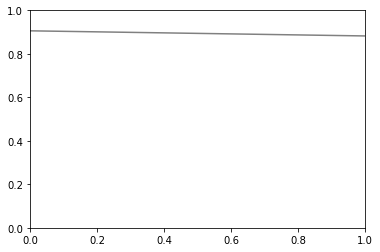

In [5]:
rootdir = '/home/anverdie/Documents/Analysis/'
pattern = re.compile('M[0-9]{6}')
mice = [os.path.join(rootdir, path) for path in os.listdir(rootdir) if pattern.match(path)]
tag = 'Psyco_all_'

dats, c = [], []
for mouse in mice:
    mouse_id = os.path.basename(os.path.normpath(mouse))
    print(mouse_id)

    paths = [os.path.join(mouse, path, 'Stims.mat') for path in os.listdir(mouse)]
    datafiles = [sio.loadmat(path) for path in paths if os.path.exists(path) and tag in path]
    if len(datafiles):
        # Get sneakpeak into evolution 
        smoothness = 100
        corrs, stims, outs = [], [], []
        for i, data in enumerate(datafiles):
            
            stim = data['ExperimentInfo']['TrialSequence'][0][0][0]
            corr = data['ExperimentInfo']['Correct'][0][0][0]
            out = data['ExperimentInfo']['OutComeTrials'][0][0][0]
            
            
            stims.append(stim)
            corrs.append(corr)
            outs.append(out)
        stims = np.array([i for s in stims for i in s])
        corrs = np.array([i for s in corrs for i in s])
        outs = np.array([i for s in outs for i in s])
        
        scores, ns = {}, []
        for t in np.arange(3, 17):
            curr_stim = np.where(stims == t)[0]
            print(len(curr_stim))
            ns.append(len(curr_stim))
            scores[t] = np.sum(corrs[curr_stim])/len(curr_stim)
                
        scs = [1-scores[k] for k in scores]
        
    
        idx_gos = np.where(stims == 1)[0]
        idx_nogos = np.where(stims == 2)[0]
        idx_blank = np.where(stims == 0)[0]
        
        c.append(np.array(scs))
        scs = [np.sum(corrs[idx_gos])/len(idx_gos)] + scs
        scs = scs + [1-np.sum(corrs[idx_nogos])/len(idx_nogos)]
        yerr = [np.sqrt((s*(1-s)/n)) for s, n in zip(scs, ns)]
        #if mouse_id=='M786656': plt.hlines(1-np.sum(corrs[idx_blank])/len(idx_blank), 0, len(scs), color='red')
        print(scs)
        plt.errorbar(np.arange(0, 16), scs, c='grey', yerr=yerr)
        plt.ylim((0, 1))


        idx_not_blank = [i for i in range(len(stims)) if not i in idx_blank]
    
        
        go_corr = corrs[idx_gos]
        nogo_corr = corrs[idx_nogos]
        blank_corr = corrs[idx_blank]
        
        
        convo_corr = np.convolve(corrs, np.ones(smoothness)/smoothness, mode='same')
        convo_go_corr = np.convolve(go_corr, np.ones(smoothness)/smoothness, mode='valid')
        convo_nogo_corr = np.convolve(nogo_corr, np.ones(smoothness)/smoothness, mode='valid')
        convo_blank_corr = np.convolve(blank_corr, np.ones(smoothness)/smoothness, mode='valid')
            
        """fig, axs = plt.subplots(3, figsize=(12, 12))        
        axs[0].plot(convo_corr, color='blue')
        axs[0].set_ylim((0, 1))
        axs[0].grid()
        
        plt.title('{}'.format(np.sum(corrs)/len(corrs)))
        axs[1].plot(convo_go_corr, color='green')
        axs[2].plot(convo_nogo_corr, color='red')
        #plt.plot(convo_blank_corr, color='purple')
        
        plt.plot
        plt.ylim((0, 1))
        plt.xlabel('# Trials')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.savefig('{}.svg'.format(mouse_id))
        plt.show()"""
    
# import natsort as n
# stims, names = get_stims('PT')

# def correlation_matrix(projections):
# 	""" Projections must be of the form : (n_proj, x, y)"""
# 	correlation_matrix = np.corrcoef(np.array([np.matrix.flatten(p) for p in projections]))

# 	return correlation_matrix

# corrmat = correlation_matrix(stims)
# plt.plot(corrmat[0])
plt.savefig('panel_L.svg')   
print(scs)

In [3]:
def get_stims(tag, rootdir=rootdir + '/Stims'):
    """ Load stims numpy array depending on tag
    """
    stims = [np.load(os.path.join(rootdir, f)) for f in n.natsorted(os.listdir(rootdir)) if tag in f]
    names = [f[:-4] for f in n.natsorted(os.listdir(rootdir)) if tag in f]
    return stims, names

In [18]:
a = [0.905894519131334, 0.8823529411764706, 0.6176470588235294, 0.8529411764705882, 0.7352941176470589, 0.9090909090909091, 0.8235294117647058, 0.9696969696969697, 0.6666666666666667, 0.030303030303030276, 0.7941176470588236, 0.2941176470588235, 0.5454545454545454, 0.1470588235294118, 0.7352941176470589, 0.2813141683778234]
b = [0.6882530120481928, 0.7956989247311828, 0.3023255813953488, 0.3978494623655914, 0.5957446808510638, 0.7790697674418605, 0.6206896551724138, 0.7764705882352941, 0.24444444444444446, 0.15116279069767447, 0.8172043010752688, 0.33684210526315794, 0.47, 0.2906976744186046, 0.5402298850574713, 0.36923076923076925]
c = [0.6882530120481928, 0.7956989247311828, 0.3023255813953488, 0.3978494623655914, 0.5957446808510638, 0.7790697674418605, 0.6206896551724138, 0.7764705882352941, 0.24444444444444446, 0.15116279069767447, 0.8172043010752688, 0.33684210526315794, 0.47, 0.2906976744186046, 0.5402298850574713, 0.36923076923076925]
d = corrmat[0]

a = np.array(a)
b = np.array(b)
c = np.array(c)
d = np.array(d)

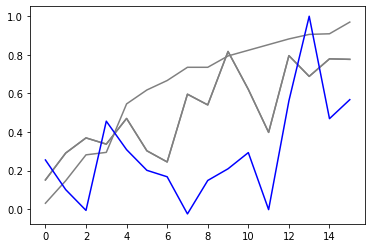

In [21]:
idx_sort = np.argsort(a)
plt.plot(a[idx_sort], c='grey')
plt.plot(b[idx_sort], c='grey')
plt.plot(c[idx_sort], c='grey')
plt.plot(d[idx_sort], c='blue')

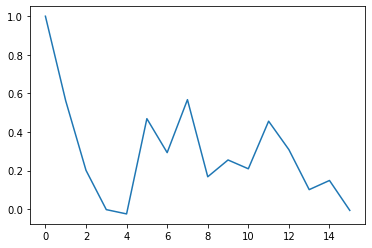

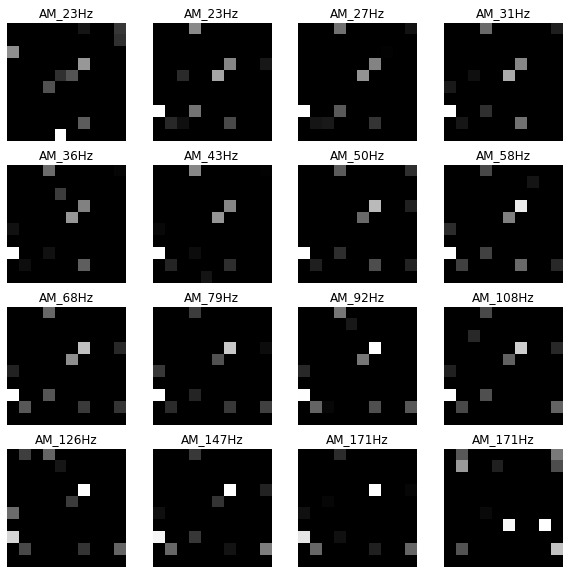

In [58]:
import natsort as n
root = '/home/anverdie/share/gaia/User_folders/Antonin/Models/Aymard_Batch/saves/Stims'
stims = [np.load(os.path.join(root, f)) for f in n.natsorted(os.listdir(root)) if 'PT' in f]
names = ['_'.join(f.split('_')[:2]) for f in n.natsorted(os.listdir(root)) if 'PT' in f]

stims_am = [np.load(os.path.join(root, f)) for f in n.natsorted(os.listdir(root)) if 'AM' in f][1:-1]
names_am = ['_'.join(f.split('_')[:2]) for f in n.natsorted(os.listdir(root)) if 'AM' in f][1:-1]

stims_am = [stims[0]] + stims_am + [stims[-1]]
names_am = [names_am[0]] + names_am + [names_am[-1]]

fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i, s in enumerate(stims_am):
    axs[i//4, i%4].imshow(s.reshape(10, 10), cmap='gist_gray')
    axs[i//4, i%4].set_title(names_am[i][:])
    axs[i//4, i%4].axis('off')
plt.savefig('first 16 stims_am.png')

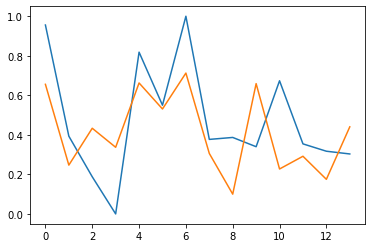

In [72]:
OA = 0.5 * stims[15] - 0.5 * stims[0]
norm_AB = np.linalg.norm(stims[15] - stims[0])
distances = []
for s in stims[1:15]:
    AD = s - stims[0] + OA
    distances.append(1 - np.dot(OA, AD)/norm_AB)

plt.plot((distances-np.min(distances))/(np.max(distances) - np.min(distances)))
plt.plot(dats[0][1:15])

In [60]:
import os
import time
import tensorflow as tf

import tensorflow.keras as keras
import numpy as np

import keras_tuner as kt
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D

from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

opt = keras.optimizers.Adam(learning_rate=0.0001)

kernel_size = 5

x, y = np.meshgrid(np.linspace(-1, 1, kernel_size), np.linspace(-1, 1, kernel_size))
dst = np.sqrt(x*x + y*y)

# Considering 1 px = 150um
sigma = np.sqrt(np.log(2)/2)
muu = 0.000

kernel_weights = np.exp(-((dst-muu)**2 / (2.0 * sigma**2)))

kernel_weights = np.expand_dims(kernel_weights, axis=-1)
kernel_weights = np.repeat(kernel_weights, 1, axis=-1)
kernel_weights = np.expand_dims(kernel_weights, axis=-1)

def gaussian_blur_filter(shape, dtype=None):
    f = np.array(kernel_weights)

    assert f.shape == shape
    return K.variable(f, dtype='float32')

gaussian_blur = Conv2D(1, kernel_size, use_bias=False, kernel_initializer=gaussian_blur_filter, padding='same', trainable=False, name='gaussian_blur')

Blurring_Model = Sequential(
    gaussian_blur
)

In [61]:
blurred_stims = [Blurring_Model(s.reshape(1, 10, 10, 1)).numpy().reshape(10, 10) for s in stims_am]

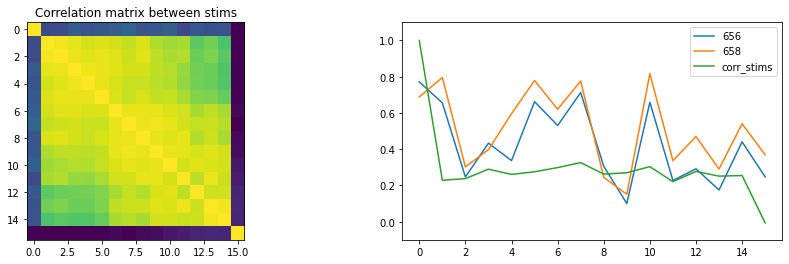

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

coeffs = np.corrcoef(np.array([s.flatten() for s in stims_am]))
axs[0].imshow(coeffs, vmin=0, vmax=1)
axs[0].set_title('Correlation matrix between stims')

axs[1].plot(dats[0], label='656')
axs[1].plot(dats[1], label='658')

axs[1].plot(coeffs[0, :], label='corr_stims')
axs[1].set_ylim((-0.1, 1.1))
axs[1].legend()
plt.savefig('corr_am.svg')

In [63]:
from scipy.spatial.distance import correlation

correlation(stims[0].flatten(), stims[15].flatten())

1.0067434995435178

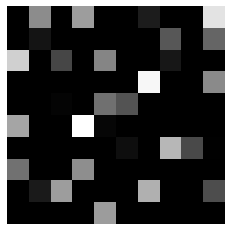

In [64]:
mean = np.sum([s * c[0][i] for i, s in enumerate(stims[1:-1])], axis=0)/14
plt.imshow(mean.reshape(10, 10), cmap='gist_gray')
plt.axis('off')
plt.savefig('mean_stim.svg')
plt.show()

In [65]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, co, dats[0])
print(popt)
plt.plot(func(co, *popt))
plt.plot(dats[0])

NameError: name 'co' is not defined